# Initial Dataset Exploration

## Data Loading

In [32]:
import sys
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project to path so we can import our modules
sys.path.append(os.path.abspath(".."))


In [33]:
# Import functionality from our source code
import src.data_loading.data_loader as data_loader
importlib.reload(data_loader)
from src.data_loading.data_loader import load_data, get_numerical_features, get_categorical_features

# Load the data
df = load_data()

Loading data from c:\Users\Utente\Desktop\STUDIO\LUISS\ANNO_3\Advanced_Coding\Credit_Score_Classification\data\raw\credit_score_dataset.csv
Loaded dataset with 100000 rows and 27 columns


## Initial Dataset Exploration

In [34]:
# Display dataset shape in a readable format
print(f"Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns\n")

# Display dataset information in a readable format
print("\n Dataset Information:\n")
df.info()

Dataset Shape: 100000 rows, 27 columns


 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-n

The dataset contains 100,000 rows and 27 columns, with a mix of numerical and categorical features. Several columns have substantial missing values, especially Name, Monthly_Inhand_Salary, Type_of_Loan, and Credit_History_Age, which will require careful handling during preprocessing. 

A total of 18 columns are stored as objects, indicating potential data type conversions are needed—particularly for numerical values stored as strings (e.g., Annual_Income, Outstanding_Debt). Only the target variable Credit_Score is fully populated, suggesting additional effort will be needed to prepare the input features for modeling.

In [35]:
print(f"Percentage of missing values for each column:\n")
print(f"{df.isnull().sum() / len(df)*100}")

Percentage of missing values for each column:

ID                           9.942
Customer_ID                  9.893
Month                        9.938
Name                        18.887
City                         9.851
Street                       9.920
Age                         14.488
SSN                         10.001
Occupation                   9.944
Annual_Income               10.094
Monthly_Inhand_Salary       23.595
Num_Bank_Accounts            9.833
Num_Credit_Card             10.062
Interest_Rate                9.849
Num_of_Loan                 10.191
Type_of_Loan                20.312
Delay_from_due_date          9.988
Num_of_Delayed_Payment      16.218
Changed_Credit_Limit        10.067
Num_Credit_Inquiries        11.898
Credit_Mix                   9.915
Outstanding_Debt             9.963
Credit_Utilization_Ratio     9.975
Credit_History_Age          18.209
Payment_of_Min_Amount        9.957
Amount_invested_monthly     14.120
Credit_Score                 0.000
dtype: f

Most features exhibit around 10% missing values, which is manageable with standard imputation techniques. However, several features show significantly higher missing rates:

- Name (18.89%)

- Monthly_Inhand_Salary (23.60%)

- Type_of_Loan (20.31%)

- Credit_History_Age (18.21%)

- Num_of_Delayed_Payment (16.22%)

## Analyze and visualize the distribution of the target class "Credit Scores"

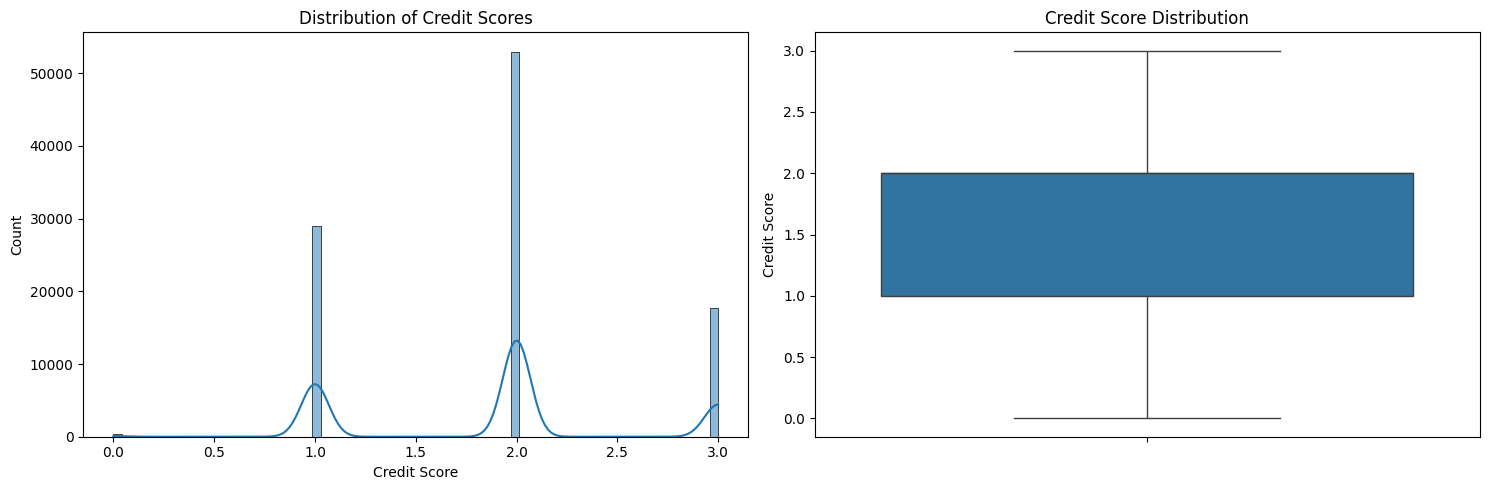


Credit Score Statistics:
--------------------------------------------------
count     : 100000.00
mean      :     1.88
std       :     0.68
min       :     0.00
25%       :     1.00
50%       :     2.00
75%       :     2.00
max       :     3.00

Count of Each Credit Score:
--------------------------------------------------
Score 0:      352 (  0.35%)
Score 1:    28953 ( 28.95%)
Score 2:    52974 ( 52.97%)
Score 3:    17721 ( 17.72%)


In [36]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Histogram with KDE
sns.histplot(data=df, x='Credit_Score', kde=True, ax=ax1)
ax1.set_title('Distribution of Credit Scores')
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Count')

# Plot 2: Box plot
sns.boxplot(data=df, y='Credit_Score', ax=ax2)
ax2.set_title('Credit Score Distribution')
ax2.set_ylabel('Credit Score')

plt.tight_layout()
plt.show()

# Print statistics with better formatting
print("\nCredit Score Statistics:")
print("-" * 50)
stats = df['Credit_Score'].describe()
for stat, value in stats.items():
    print(f"{stat:10}: {value:8.2f}")

print("\nCount of Each Credit Score:")
print("-" * 50)
counts = df['Credit_Score'].value_counts().sort_index()
for score, count in counts.items():
    print(f"Score {score}: {count:8d} ({count/len(df)*100:6.2f}%)")

The target variable Credit_Score is imbalanced, with the majority of samples concentrated in class 2 (52.97%) and class 1 (28.95%). Class 3 accounts for 17.72%, while class 0 is extremely rare (0.35%), potentially representing outliers or mislabeled entries. The distribution suggests that special care is needed during model training—such as using stratified sampling or applying resampling techniques to prevent the model from being biased toward the dominant classes.

## Exploring other features

### Numeric Features

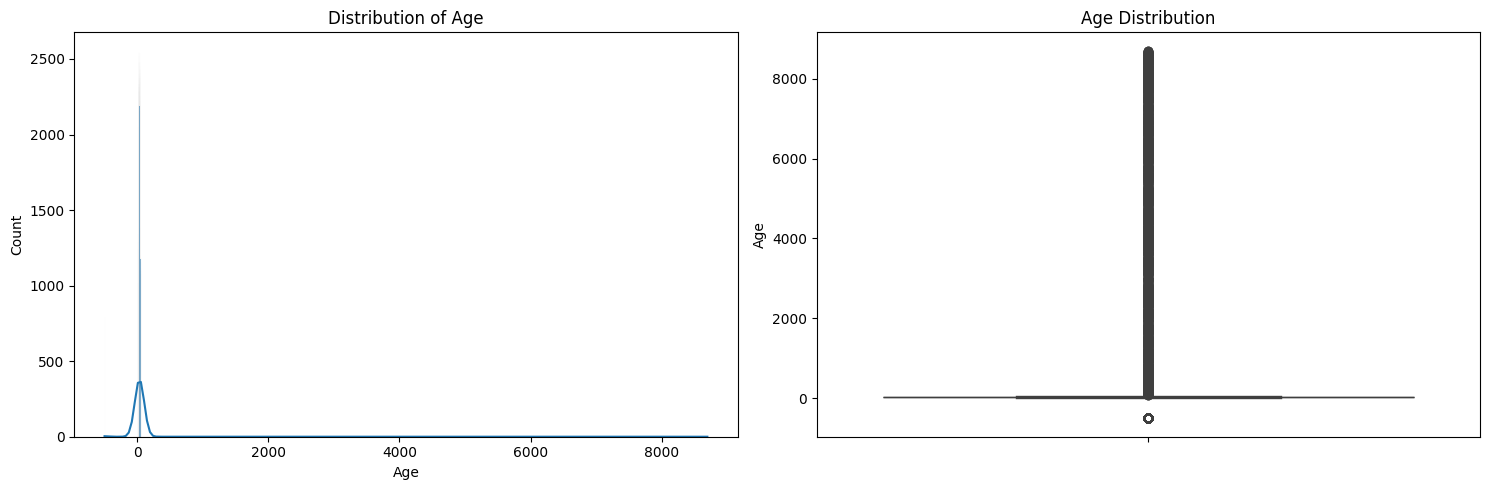


Age Statistics:
--------------------------------------------------
count     : 85512.00
mean      :   110.23
std       :   684.91
min       :  -500.00
25%       :    24.00
50%       :    33.00
75%       :    42.00
max       :  8698.00




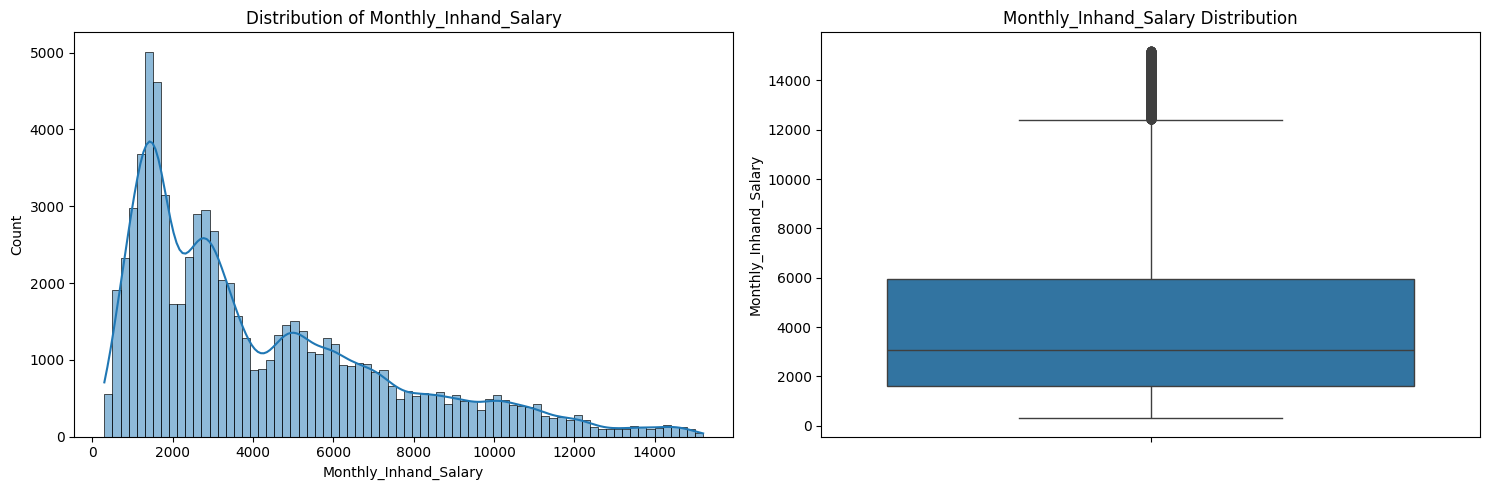


Monthly_Inhand_Salary Statistics:
--------------------------------------------------
count     : 76405.00
mean      :  4185.79
std       :  3178.56
min       :   303.65
25%       :  1625.02
50%       :  3086.68
75%       :  5940.32
max       : 15204.63




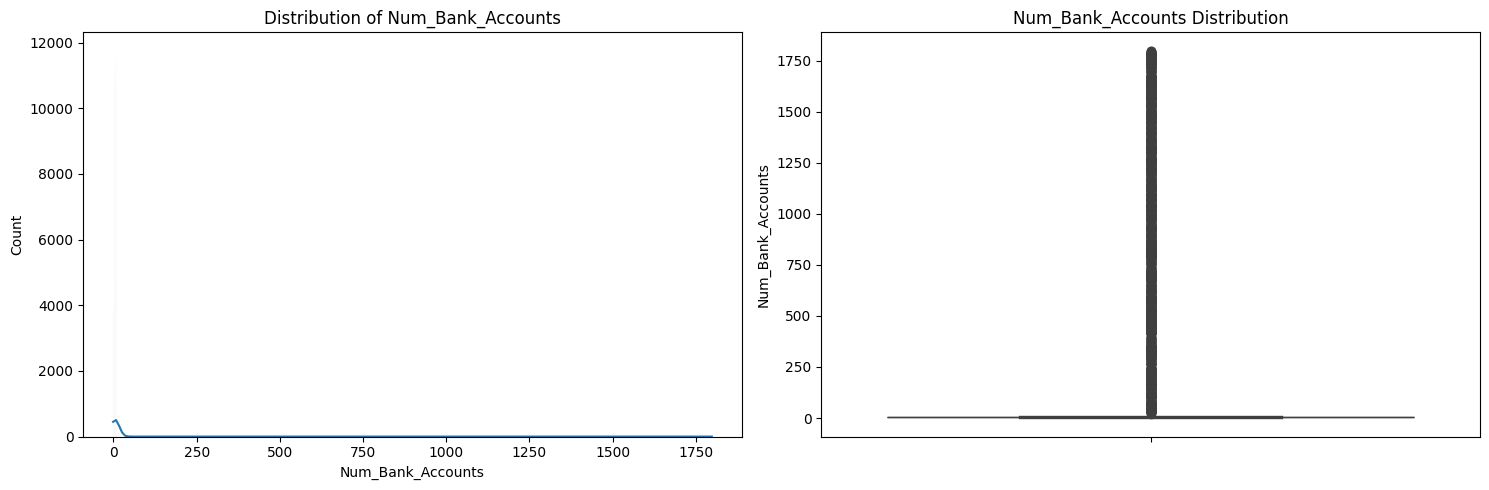


Num_Bank_Accounts Statistics:
--------------------------------------------------
count     : 90167.00
mean      :    17.11
std       :   117.73
min       :    -1.00
25%       :     3.00
50%       :     6.00
75%       :     7.00
max       :  1798.00




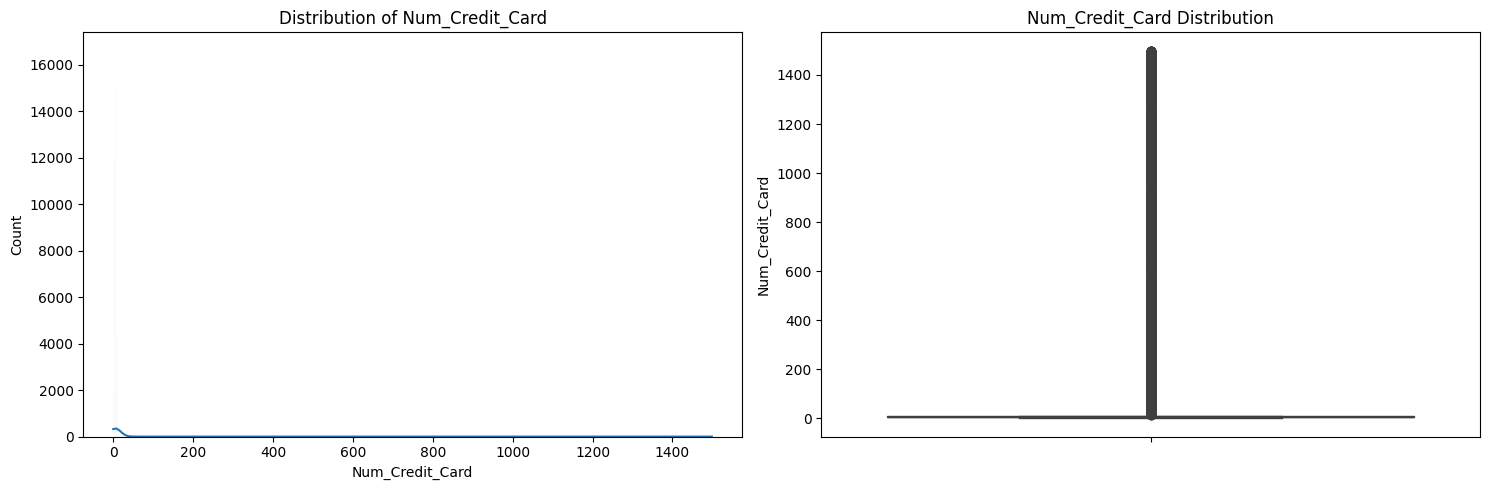


Num_Credit_Card Statistics:
--------------------------------------------------
count     : 89938.00
mean      :    22.45
std       :   129.04
min       :     0.00
25%       :     4.00
50%       :     5.00
75%       :     7.00
max       :  1499.00




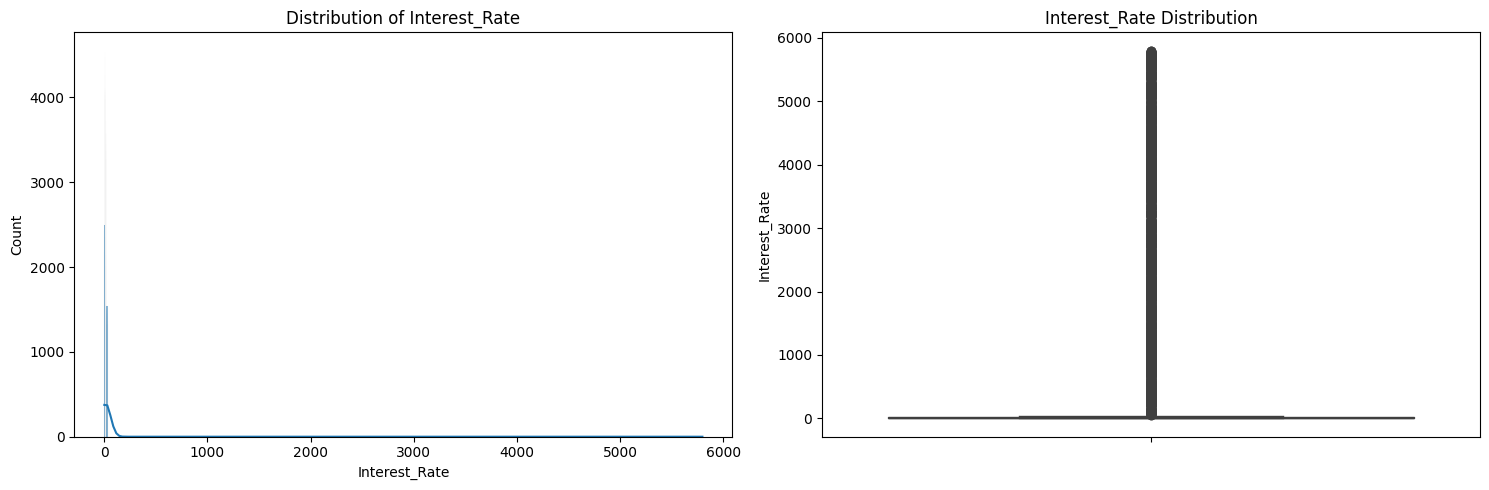


Interest_Rate Statistics:
--------------------------------------------------
count     : 90151.00
mean      :    72.34
std       :   465.68
min       :     1.00
25%       :     8.00
50%       :    13.00
75%       :    20.00
max       :  5797.00




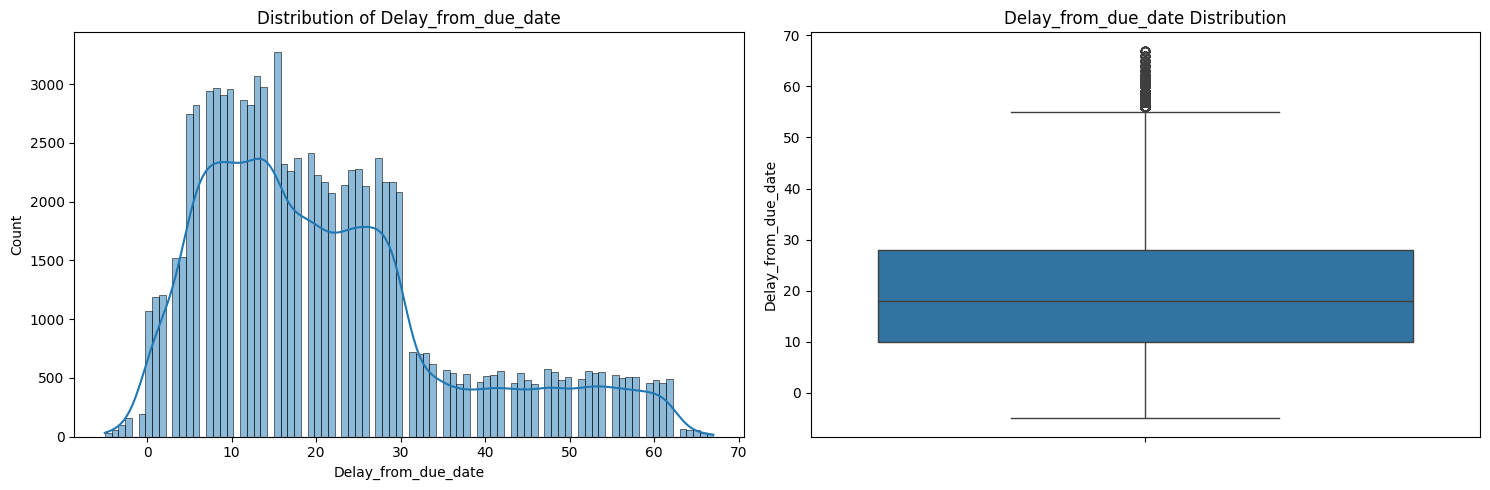


Delay_from_due_date Statistics:
--------------------------------------------------
count     : 90012.00
mean      :    21.08
std       :    14.86
min       :    -5.00
25%       :    10.00
50%       :    18.00
75%       :    28.00
max       :    67.00




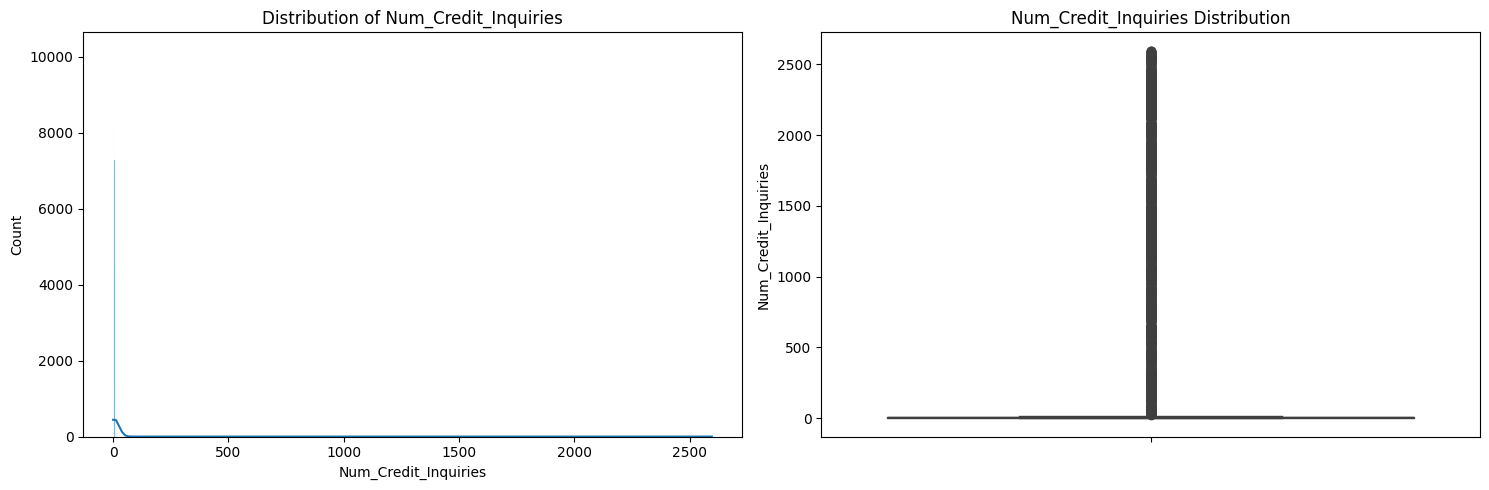


Num_Credit_Inquiries Statistics:
--------------------------------------------------
count     : 88102.00
mean      :    27.85
std       :   193.61
min       :     0.00
25%       :     3.00
50%       :     6.00
75%       :     9.00
max       :  2597.00




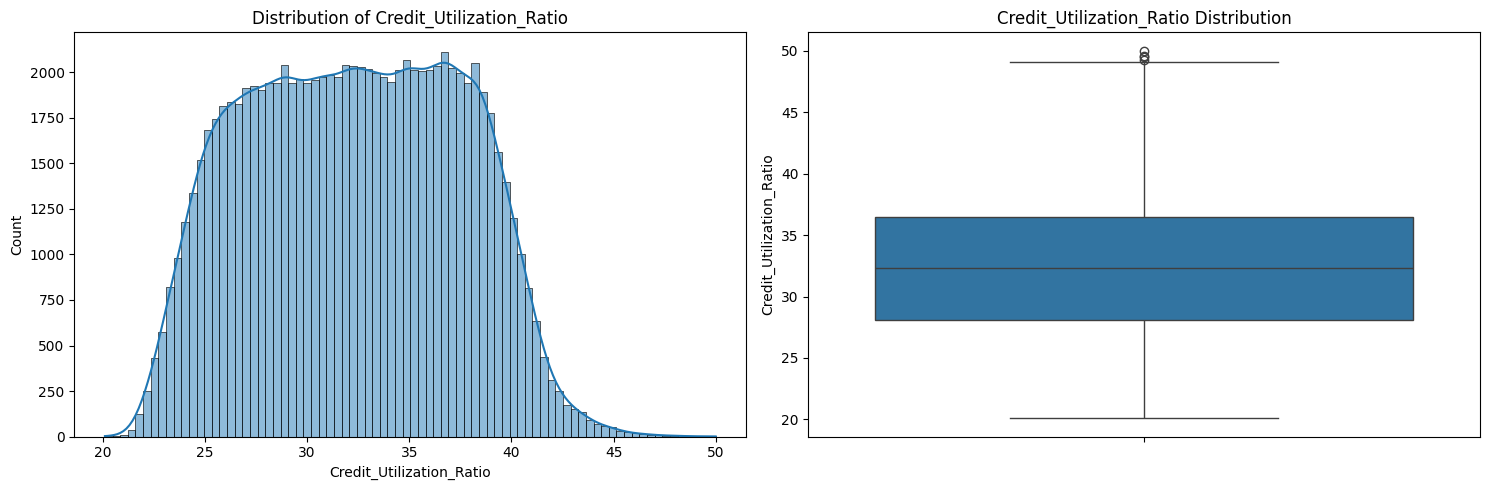


Credit_Utilization_Ratio Statistics:
--------------------------------------------------
count     : 90025.00
mean      :    32.29
std       :     5.11
min       :    20.10
25%       :    28.06
50%       :    32.32
75%       :    36.50
max       :    50.00




In [37]:
list_numerical_features = get_numerical_features(df)
numeric_features = [col for col in list_numerical_features if col != 'Credit_Score']


for col in numeric_features:
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot 1: Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')
    
    # Plot 2: Box plot
    sns.boxplot(data=df, y=col, ax=ax2)
    ax2.set_title(f'{col} Distribution')
    ax2.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n{col} Statistics:")
    print("-" * 50)
    stats = df[col].describe()
    for stat, value in stats.items():
        print(f"{stat:10}: {value:8.2f}")
    print("\n")

Several numerical features exhibit signs of data quality issues and potential outliers:

- Age contains extreme outliers (min = -500, max = 8698), far beyond human lifespan, suggesting data entry errors. The interquartile range (24–42) indicates realistic values are concentrated within this span.

- Monthly_Inhand_Salary appears reasonably distributed, with a median of ~3,086 and a max of ~15,200. No clear anomalies are observed.

- Num_Bank_Accounts and Num_Credit_Card both show extreme outliers (e.g., up to 1,798 and 1,499 respectively), while the median values (6 and 5) are more plausible. Values like -1 in Num_Bank_Accounts are clearly invalid.

- Interest_Rate has a surprisingly high max value (5,797) compared to its median (13), indicating potential outliers or misformatted entries.

- Delay_from_due_date mostly follows a plausible distribution, although the presence of a negative value (-5) may require correction.

- Num_Credit_Inquiries similarly shows high skewness with a max of 2,597, well above the typical range (Q3 = 9).

- Credit_Utilization_Ratio is well-bounded between 20.1 and 50.0, with minimal spread, suggesting it's clean and reliable.

Overall, several features will require outlier treatment and validation of unrealistic values to ensure model robustness and accurate interpretation.

### Relationship Between Numeric Features and Credit Score


Analysis of Age vs Credit_Score
--------------------------------------------------


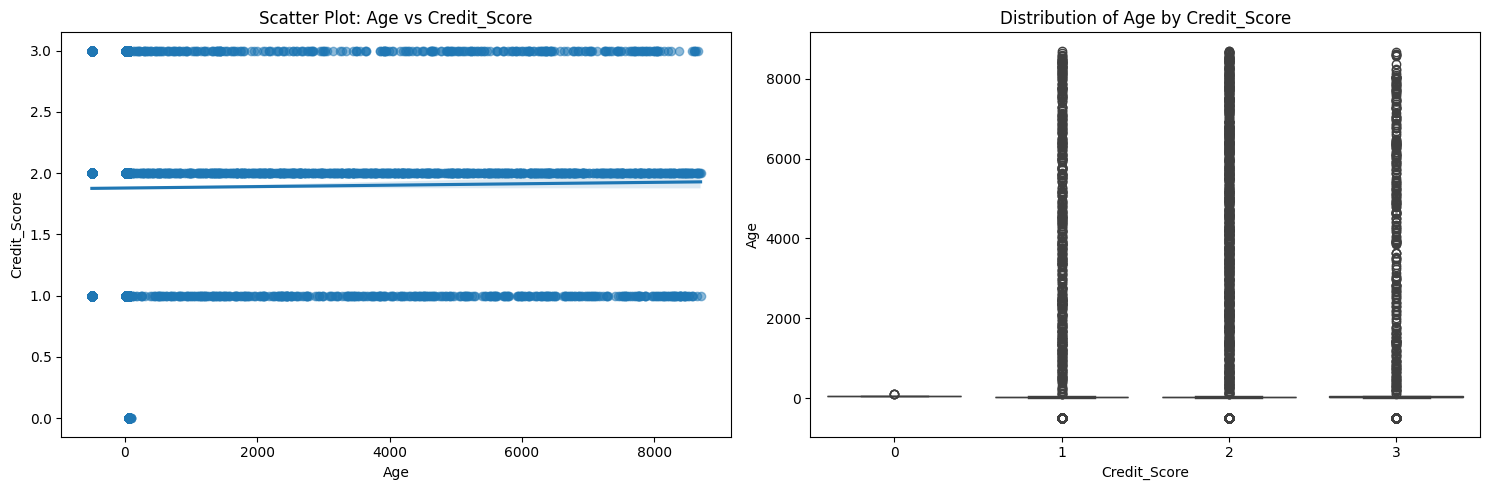


Statistical Summary:
------------------------------
              count        mean         std    min     max
Credit_Score                                              
0               313   56.511182    4.504346   56.0    99.0
1             24758  105.720252  675.277646 -500.0  8697.0
2             45341  111.138638  687.936622 -500.0  8698.0
3             15100  115.991457  698.387784 -500.0  8655.0

Correlation between Age and Credit_Score: 0.006

Analysis of Monthly_Inhand_Salary vs Credit_Score
--------------------------------------------------


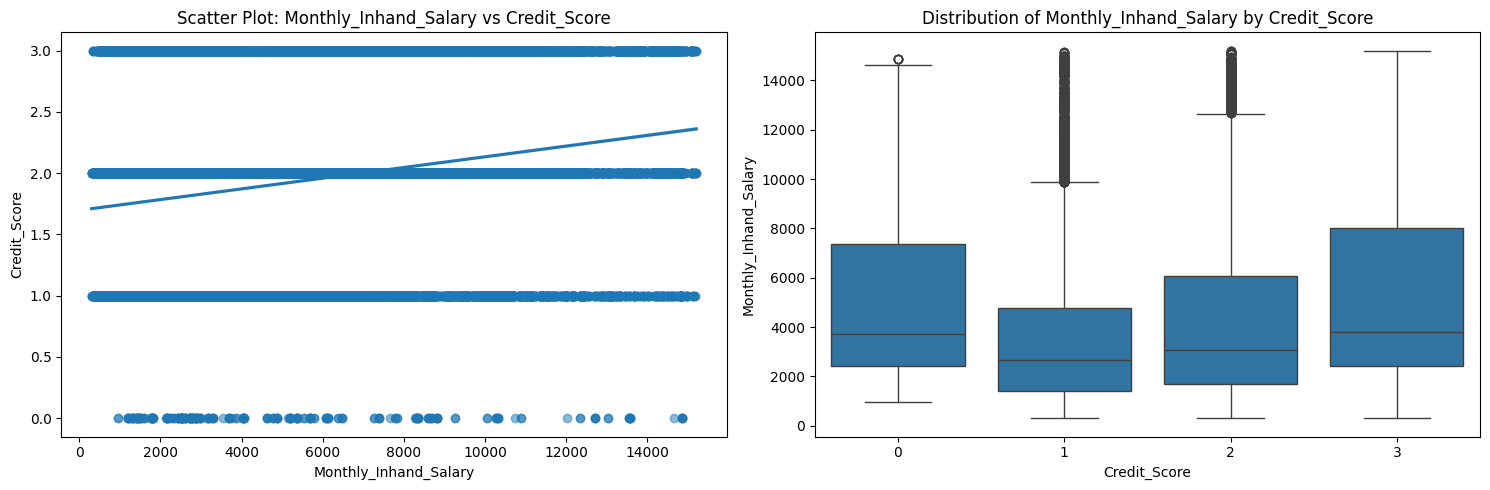


Statistical Summary:
------------------------------
              count         mean          std         min          max
Credit_Score                                                          
0               266  5107.381071  3644.421485  963.919167  14855.93000
1             22100  3369.838251  2652.722744  319.556250  15167.18000
2             40556  4225.826852  3121.957947  303.645417  15204.63333
3             13483  5384.603340  3686.694548  332.128333  15204.63333

Correlation between Monthly_Inhand_Salary and Credit_Score: 0.203

Analysis of Num_Bank_Accounts vs Credit_Score
--------------------------------------------------


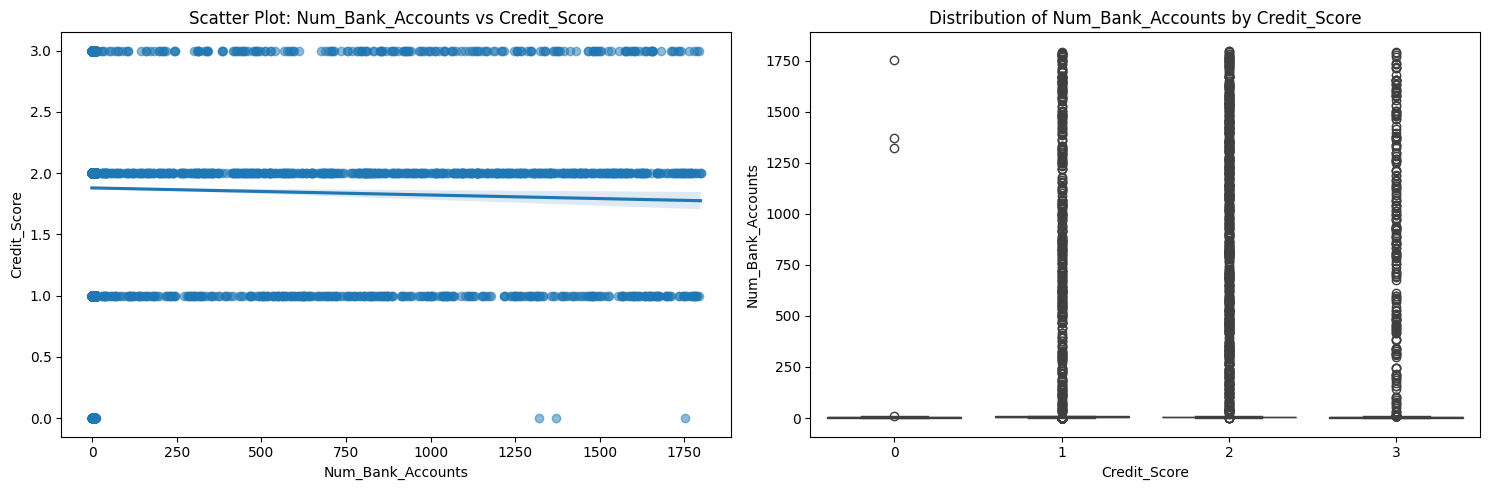


Statistical Summary:
------------------------------
              count       mean         std  min     max
Credit_Score                                           
0               322  17.680124  143.328219  0.0  1751.0
1             26214  18.800221  120.639476 -1.0  1793.0
2             47690  16.749088  115.507718 -1.0  1798.0
3             15941  15.371432  118.861667 -1.0  1794.0

Correlation between Num_Bank_Accounts and Credit_Score: -0.010

Analysis of Num_Credit_Card vs Credit_Score
--------------------------------------------------


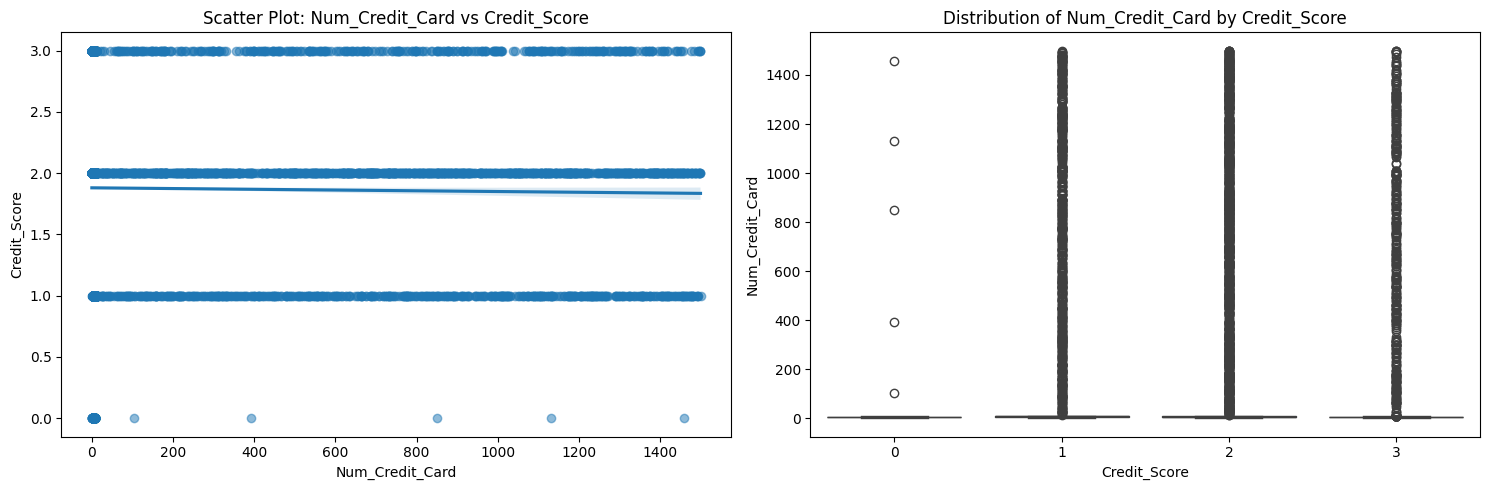


Statistical Summary:
------------------------------
              count       mean         std  min     max
Credit_Score                                           
0               320  17.062500  114.813284  1.0  1459.0
1             26044  23.679158  130.653616  1.0  1499.0
2             47676  22.164821  128.083570  0.0  1498.0
3             15898  21.396717  129.486086  0.0  1498.0

Correlation between Num_Credit_Card and Credit_Score: -0.006

Analysis of Interest_Rate vs Credit_Score
--------------------------------------------------


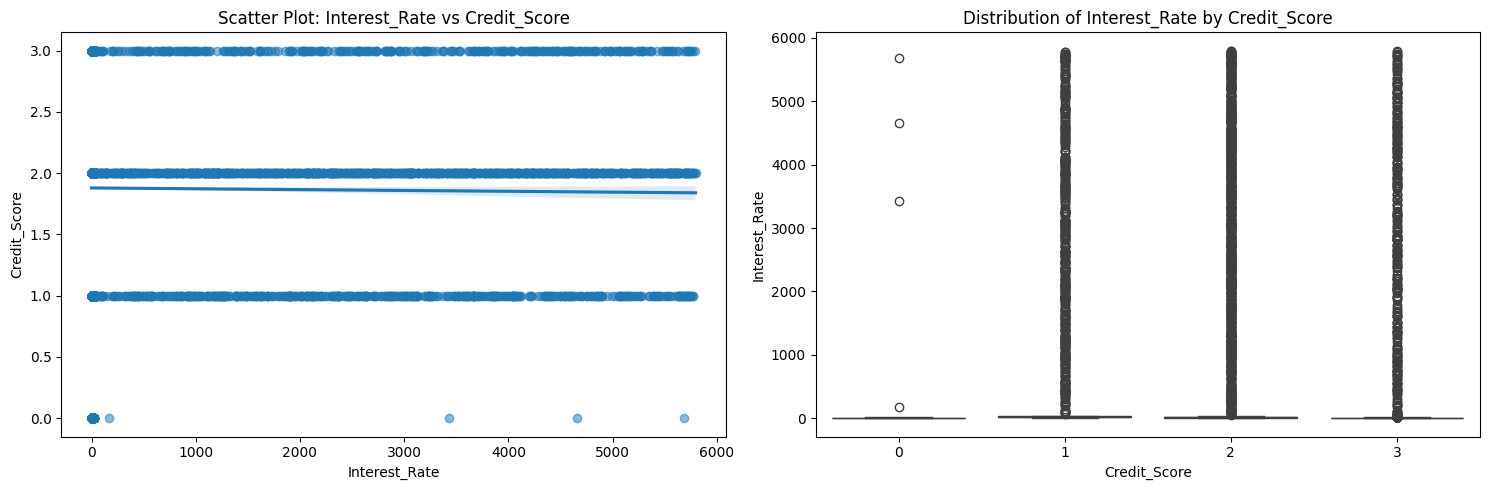


Statistical Summary:
------------------------------
              count       mean         std  min     max
Credit_Score                                           
0               312  54.259615  456.994445  1.0  5682.0
1             26175  77.426017  456.452901  1.0  5774.0
2             47747  69.939221  460.849663  1.0  5797.0
3             15917  71.554564  494.400834  1.0  5788.0

Correlation between Interest_Rate and Credit_Score: -0.005

Analysis of Delay_from_due_date vs Credit_Score
--------------------------------------------------


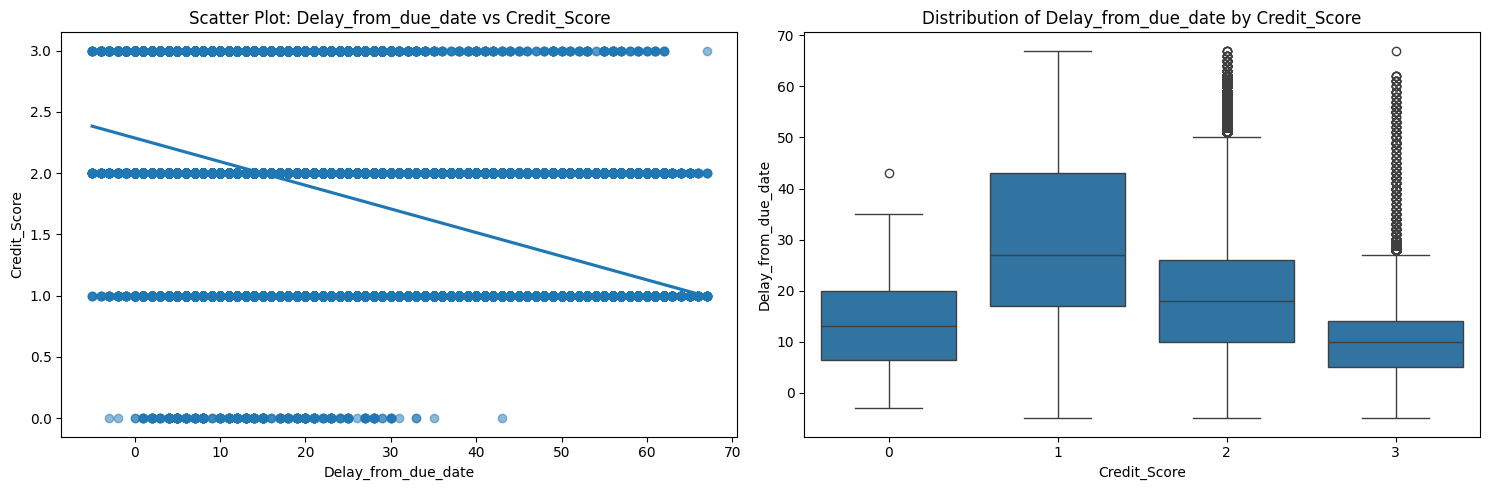


Statistical Summary:
------------------------------
              count       mean        std  min   max
Credit_Score                                        
0               319  13.626959   8.223415 -3.0  43.0
1             26031  29.775383  16.320305 -5.0  67.0
2             47735  19.786006  12.996645 -5.0  67.0
3             15927  10.902367   8.498566 -5.0  67.0

Correlation between Delay_from_due_date and Credit_Score: -0.420

Analysis of Num_Credit_Inquiries vs Credit_Score
--------------------------------------------------


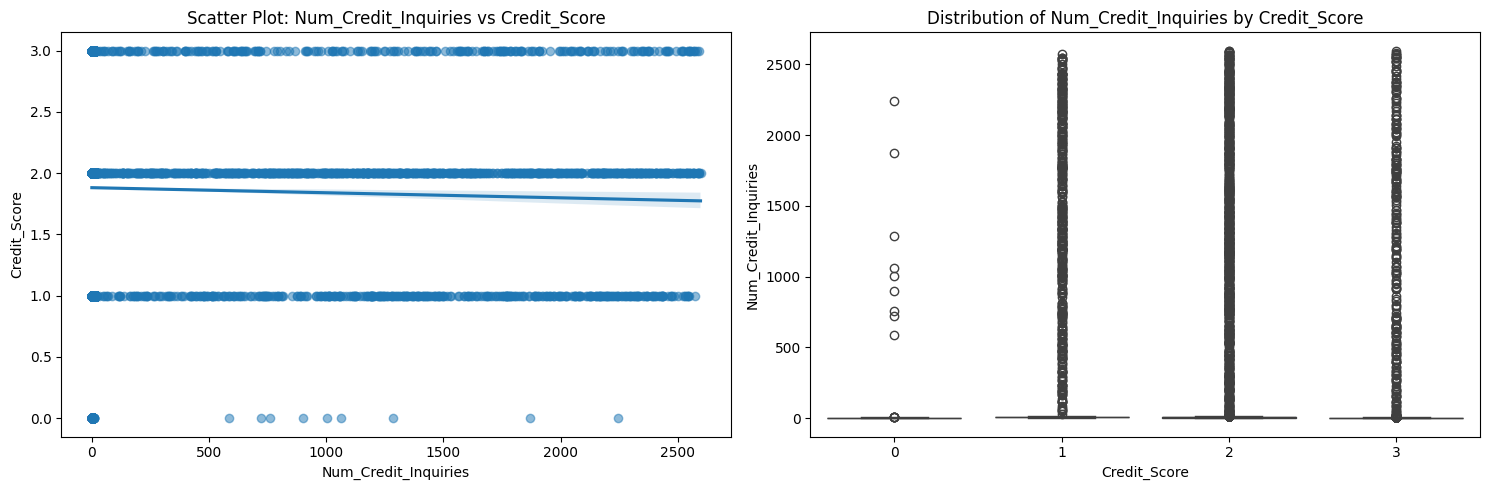


Statistical Summary:
------------------------------
              count       mean         std  min     max
Credit_Score                                           
0               309  36.595469  214.428313  0.0  2243.0
1             25475  30.963729  196.920182  0.0  2572.0
2             46726  27.205774  192.248007  0.0  2597.0
3             15592  24.502309  191.726587  0.0  2592.0

Correlation between Num_Credit_Inquiries and Credit_Score: -0.012

Analysis of Credit_Utilization_Ratio vs Credit_Score
--------------------------------------------------


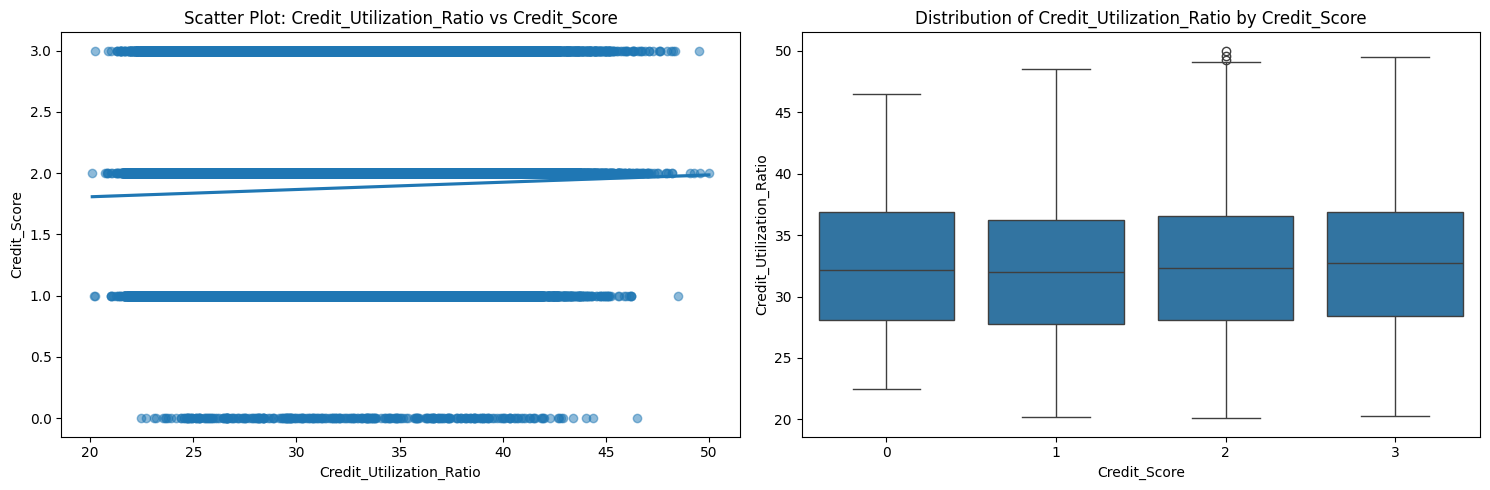


Statistical Summary:
------------------------------
              count       mean       std        min        max
Credit_Score                                                  
0               318  32.484712  5.409258  22.476023  46.504171
1             26067  31.989024  5.045124  20.172942  48.489852
2             47689  32.323744  5.107976  20.100770  50.000000
3             15951  32.682544  5.211156  20.257073  49.522324

Correlation between Credit_Utilization_Ratio and Credit_Score: 0.044


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'Credit_Score'

for feature in numeric_features:    
        print(f"\nAnalysis of {feature} vs {target}")
        print("-" * 50)
        
        # Create figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot 1: Scatter plot with regression line
        sns.regplot(data=df, x=feature, y=target, ax=ax1, scatter_kws={'alpha':0.5})
        ax1.set_title(f'Scatter Plot: {feature} vs {target}')
        
        # Plot 2: Box plot grouped by target
        sns.boxplot(data=df, y=feature, x=target, ax=ax2)
        ax2.set_title(f'Distribution of {feature} by {target}')
        
        plt.tight_layout()
        plt.show()
        
        # Statistical Summary
        print("\nStatistical Summary:")
        print("-" * 30)
        summary = df.groupby(target)[feature].agg(['count', 'mean', 'std', 'min', 'max'])
        print(summary)
        
        # Correlation
        correlation = df[[feature, target]].corr().iloc[0,1]
        print(f"\nCorrelation between {feature} and {target}: {correlation:.3f}")


Analyzing the relationship between numerical features and the target class Credit_Score reveals the following key insights:

- Age has very weak correlation with credit score (ρ ≈ 0.006). Extreme outliers (e.g., negative and excessively high values) likely distort the mean, as realistic ages lie in a much smaller range. Cleaning is essential before trusting any patterns.

- Monthly_Inhand_Salary shows a moderate positive correlation (ρ ≈ 0.203), with average salary increasing progressively with credit score—from ~3,370 for class 1 to ~5,380 for class 3. This feature appears informative and consistent with financial behavior expectations.

- Num_Bank_Accounts and Num_Credit_Card have negligible or slightly negative correlation with credit score. High variance and extreme outliers (e.g., thousands of accounts/cards) dilute their predictive strength. 

- Interest_Rate also shows no meaningful correlation (ρ ≈ -0.005), possibly due to data quality issues or its complex relationship with other financial variables.

- Delay_from_due_date stands out with a strong negative correlation (ρ ≈ -0.42). As delay increases, credit score tends to decrease—indicating this is a highly predictive feature for creditworthiness.

- Num_Credit_Inquiries has a slight negative trend (ρ ≈ -0.012), but its predictive value may be affected by outliers and should be treated carefully during feature engineering.

- Credit_Utilization_Ratio shows a weak positive correlation (ρ ≈ 0.044), with slightly higher utilization in higher-scoring clients. Though not strong, it may contribute marginally in combination with other features.

## Categorical features

In [39]:
list_categorical_features = get_categorical_features(df)
print("\nCategorical columns (with number of unique values):")

for col in list_categorical_features:
    value_counts = df[col].value_counts()
    print(f"{col}: ({len(value_counts)})")



Categorical columns (with number of unique values):
ID: (90058)
Customer_ID: (12500)
Month: (8)
Name: (10139)
City: (4)
Street: (31)
SSN: (12501)
Occupation: (21)
Annual_Income: (18438)
Num_of_Loan: (399)
Type_of_Loan: (6260)
Num_of_Delayed_Payment: (684)
Changed_Credit_Limit: (3592)
Credit_Mix: (4)
Outstanding_Debt: (13088)
Credit_History_Age: (404)
Payment_of_Min_Amount: (3)
Amount_invested_monthly: (81866)


The dataset contains several object-type columns, which can be grouped as follows:

- Identifier Columns:
  - ID, Customer_ID, SSN, and Name have high cardinality and serve as unique or quasi-unique identifiers. These are not suitable for modeling directly and should be excluded or used only for data linkage or aggregation.

- True Categorical Features:
  - Columns like Month (8), City (4), Street (31), Occupation (21), Credit_Mix (4), and Payment_of_Min_Amount (3) have relatively low cardinality and represent genuine categorical attributes appropriate for encoding (e.g., one-hot or ordinal).

- Object Columns Needing Type Conversion:
  - Features such as Annual_Income, Num_of_Loan, Type_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Outstanding_Debt, Credit_History_Age, and Amount_invested_monthly are stored as objects but contain numerical or semi-numerical data. These require cleaning and conversion to numerical types before use in modeling.

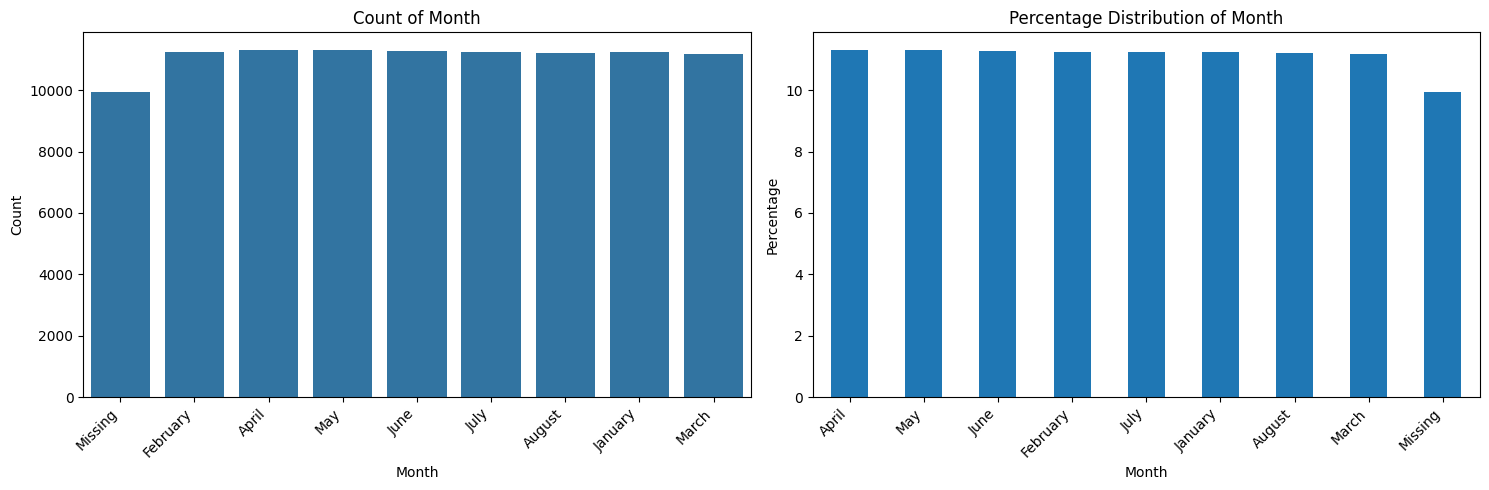


Month Statistics:
--------------------------------------------------
April               :    11319 ( 11.32%)
May                 :    11318 ( 11.32%)
June                :    11283 ( 11.28%)
February            :    11247 ( 11.25%)
July                :    11244 ( 11.24%)
January             :    11237 ( 11.24%)
August              :    11223 ( 11.22%)
March               :    11191 ( 11.19%)
Missing             :     9938 (  9.94%)




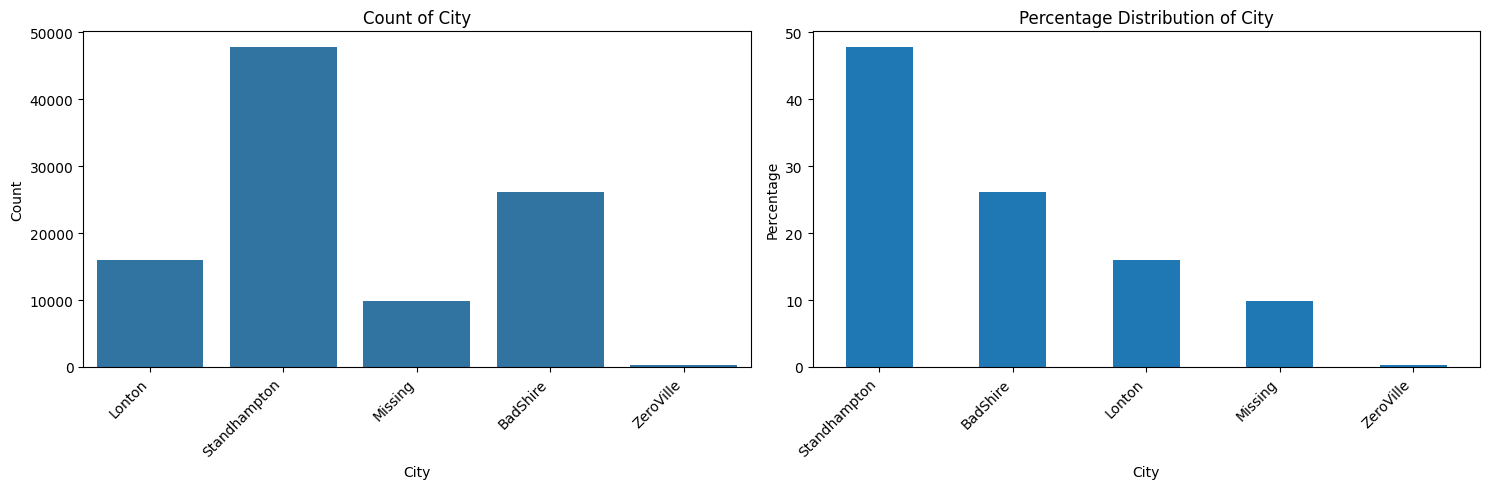


City Statistics:
--------------------------------------------------
Standhampton        :    47744 ( 47.74%)
BadShire            :    26066 ( 26.07%)
Lonton              :    16024 ( 16.02%)
Missing             :     9851 (  9.85%)
ZeroVille           :      315 (  0.32%)




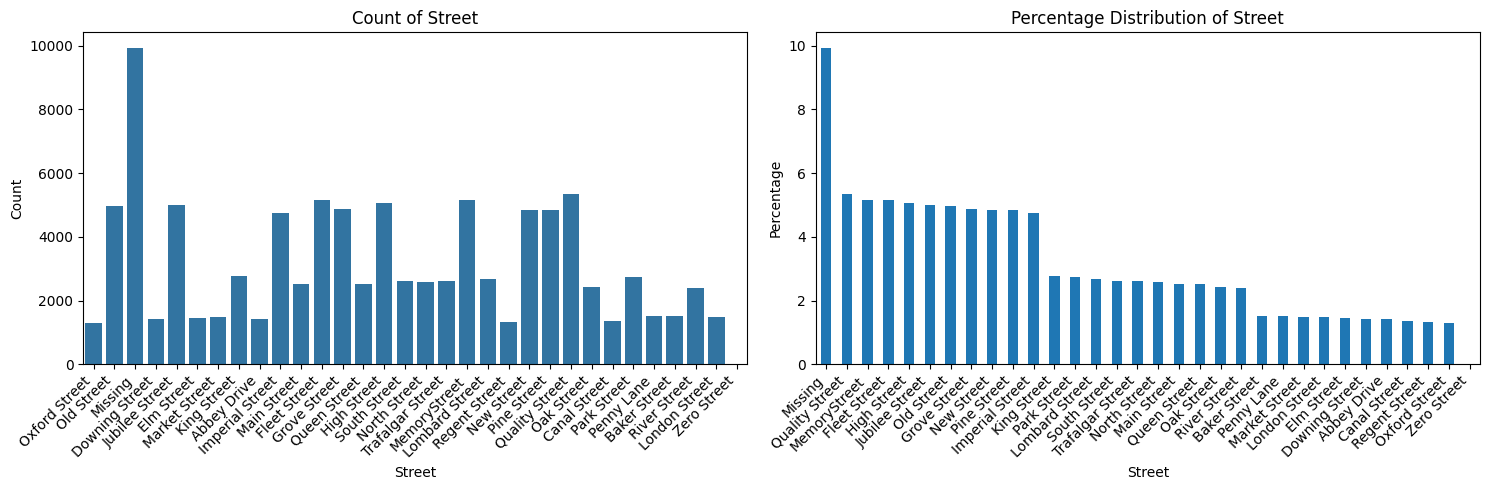


Street Statistics:
--------------------------------------------------
Missing             :     9920 (  9.92%)
Quality Street      :     5343 (  5.34%)
MemoryStreet        :     5168 (  5.17%)
Fleet Street        :     5151 (  5.15%)
High Street         :     5052 (  5.05%)
Jubilee Street      :     4998 (  5.00%)
Old Street          :     4960 (  4.96%)
Grove Street        :     4881 (  4.88%)
New Street          :     4851 (  4.85%)
Pine Street         :     4835 (  4.83%)
Imperial Street     :     4756 (  4.76%)
King Street         :     2760 (  2.76%)
Park Street         :     2730 (  2.73%)
Lombard Street      :     2662 (  2.66%)
South Street        :     2604 (  2.60%)
Trafalgar Street    :     2598 (  2.60%)
North Street        :     2567 (  2.57%)
Main Street         :     2531 (  2.53%)
Queen Street        :     2528 (  2.53%)
Oak Street          :     2410 (  2.41%)
River Street        :     2386 (  2.39%)
Baker Street        :     1518 (  1.52%)
Penny Lane          :     1

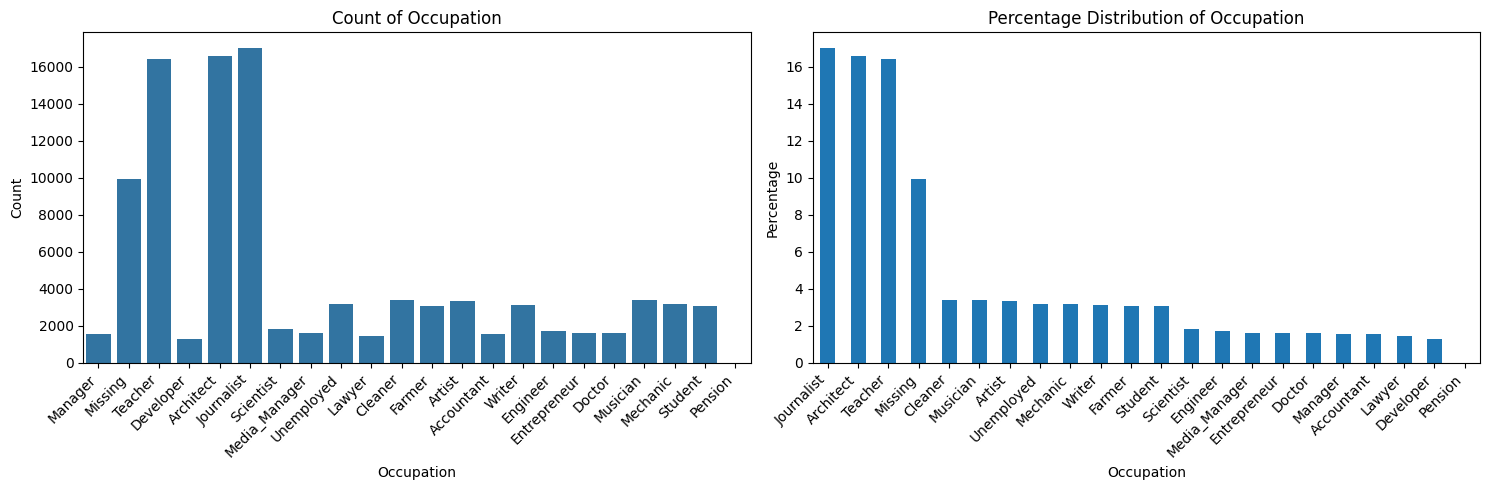


Occupation Statistics:
--------------------------------------------------
Journalist          :    17002 ( 17.00%)
Architect           :    16576 ( 16.58%)
Teacher             :    16397 ( 16.40%)
Missing             :     9944 (  9.94%)
Cleaner             :     3418 (  3.42%)
Musician            :     3384 (  3.38%)
Artist              :     3360 (  3.36%)
Unemployed          :     3178 (  3.18%)
Mechanic            :     3160 (  3.16%)
Writer              :     3125 (  3.12%)
Farmer              :     3083 (  3.08%)
Student             :     3065 (  3.06%)
Scientist           :     1826 (  1.83%)
Engineer            :     1723 (  1.72%)
Media_Manager       :     1630 (  1.63%)
Entrepreneur        :     1623 (  1.62%)
Doctor              :     1619 (  1.62%)
Manager             :     1588 (  1.59%)
Accountant          :     1578 (  1.58%)
Lawyer              :     1432 (  1.43%)
Developer           :     1283 (  1.28%)
Pension             :        6 (  0.01%)




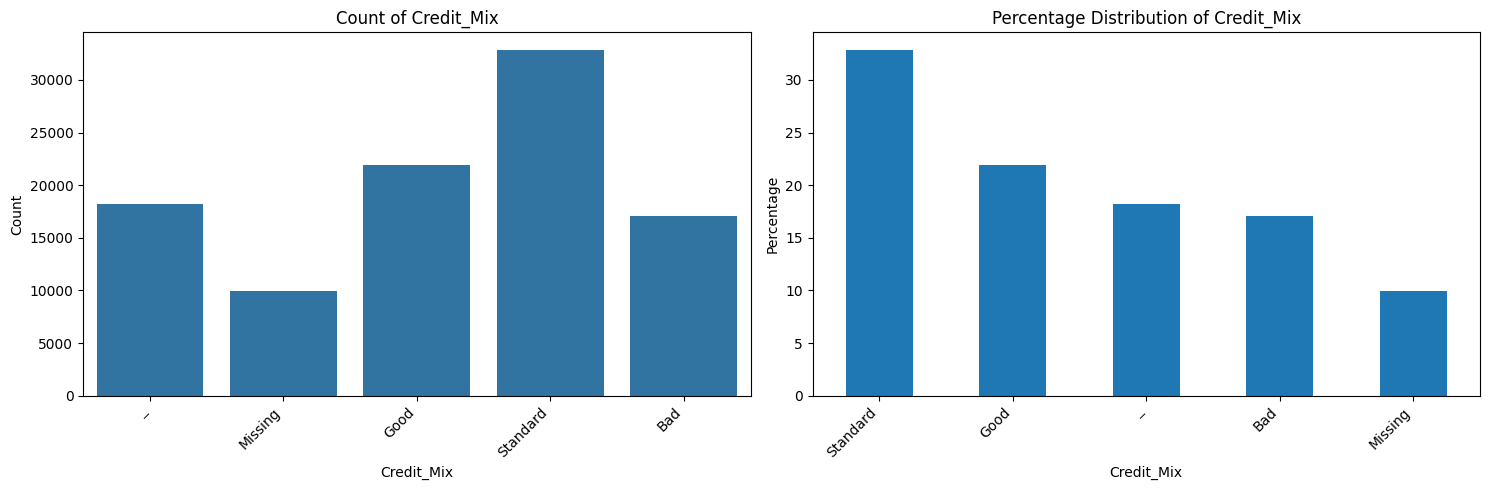


Credit_Mix Statistics:
--------------------------------------------------
Standard            :    32875 ( 32.88%)
Good                :    21915 ( 21.92%)
_                   :    18210 ( 18.21%)
Bad                 :    17085 ( 17.09%)
Missing             :     9915 (  9.92%)




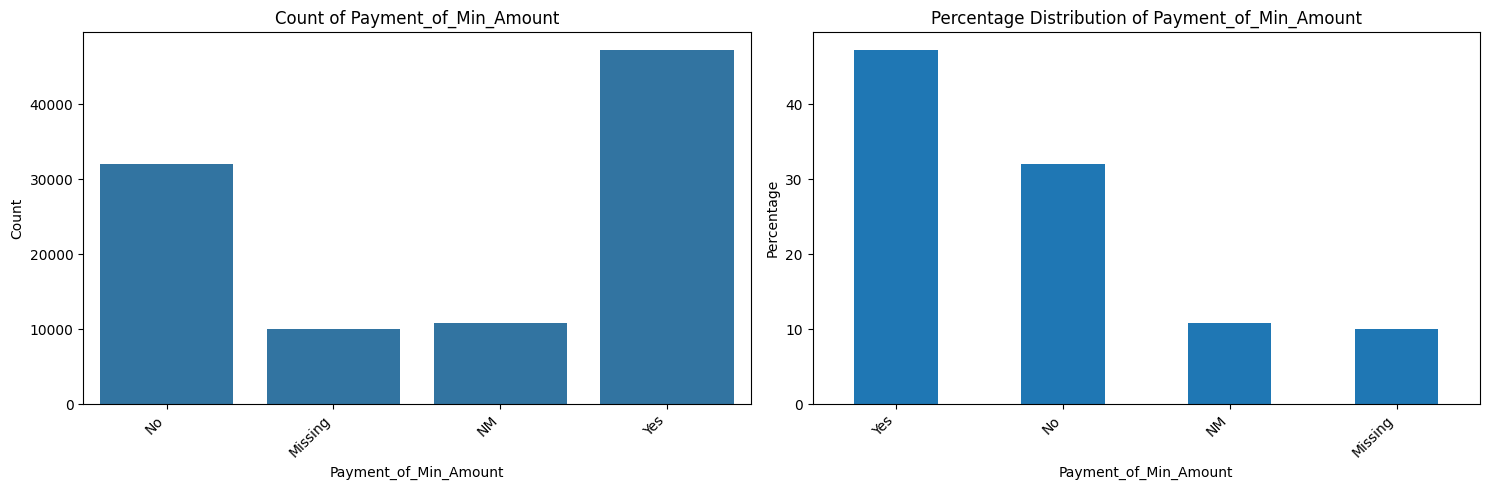


Payment_of_Min_Amount Statistics:
--------------------------------------------------
Yes                 :    47204 ( 47.20%)
No                  :    32024 ( 32.02%)
NM                  :    10815 ( 10.81%)
Missing             :     9957 (  9.96%)




In [40]:
true_categorical_features = ['Month', 'City', 'Street', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']


for col in true_categorical_features:
        # Create figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Create a copy of the column with missing values as a category
        df_with_missing = df.copy()
        df_with_missing[col] = df_with_missing[col].fillna('Missing')
        
        # Plot 1: Count plot
        sns.countplot(data=df_with_missing, x=col, ax=ax1)
        ax1.set_title(f'Count of {col}')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Count')
        plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
        
        # Plot 2: Percentage plot
        (df_with_missing[col].value_counts(normalize=True) * 100).plot(kind='bar', ax=ax2)
        ax2.set_title(f'Percentage Distribution of {col}')
        ax2.set_xlabel(col)
        ax2.set_ylabel('Percentage')
        plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\n{col} Statistics:")
        print("-" * 50)
        counts = df_with_missing[col].value_counts()
        percentages = df_with_missing[col].value_counts(normalize=True) * 100
        for category, count in counts.items():
            print(f"{category:20}: {count:8d} ({percentages[category]:6.2f}%)")
        print("\n")

The key categorical features in the dataset reveal useful patterns but also raise a few concerns:

- Month is evenly distributed across all 8 months, with each contributing around ~11% of the data. Around 10% of records are missing, which aligns with earlier findings and can likely be inferred based on customer patterns.

- City is heavily imbalanced, with nearly half the records coming from Standhampton (47.74%). ZeroVille appears anomalous, representing only 0.32% of entries—this may warrant verification. ~9.85% of values are missing.

- Street includes 31 unique categories, with a long tail of low-frequency streets and ~10% missing values. Streets like Quality Street, MemoryStreet, and Fleet Street are the most common. The presence of Zero Street (only 6 records) might signal a placeholder or invalid entry.

- Occupation is relatively balanced in the top categories, with Journalist, Architect, and Teacher being most common. However, the inclusion of "Pension" with only 6 occurrences and a ~10% missing rate suggests this feature needs minor cleanup and imputation.

- Credit_Mix shows some imbalance: Standard is the most frequent (32.88%), and nearly 18% are labeled with _, indicating possible placeholder or malformed values that should be addressed during cleaning.

- Payment_of_Min_Amount is dominated by Yes (47.20%) and No (32.02%), while NM and missing values together account for ~21%, signaling uncertainty or ambiguity that needs clarification before encoding.



### Relationship Between True Categorical Features and Credit Score


Analysis of Month vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
          count      mean       std  min  max  percentage
Month                                                    
April     11319  1.890980  0.691980    0    3       11.32
August    11223  1.888443  0.703147    0    3       11.22
February  11247  1.872855  0.657667    0    3       11.25
January   11237  1.875145  0.654817    0    3       11.24
July      11244  1.891142  0.702264    0    3       11.24
June      11283  1.881060  0.702288    0    3       11.28
March     11191  1.866500  0.658114    0    3       11.19
May       11318  1.881516  0.692435    0    3       11.32
Missing    9938  1.877641  0.681799    0    3        9.94


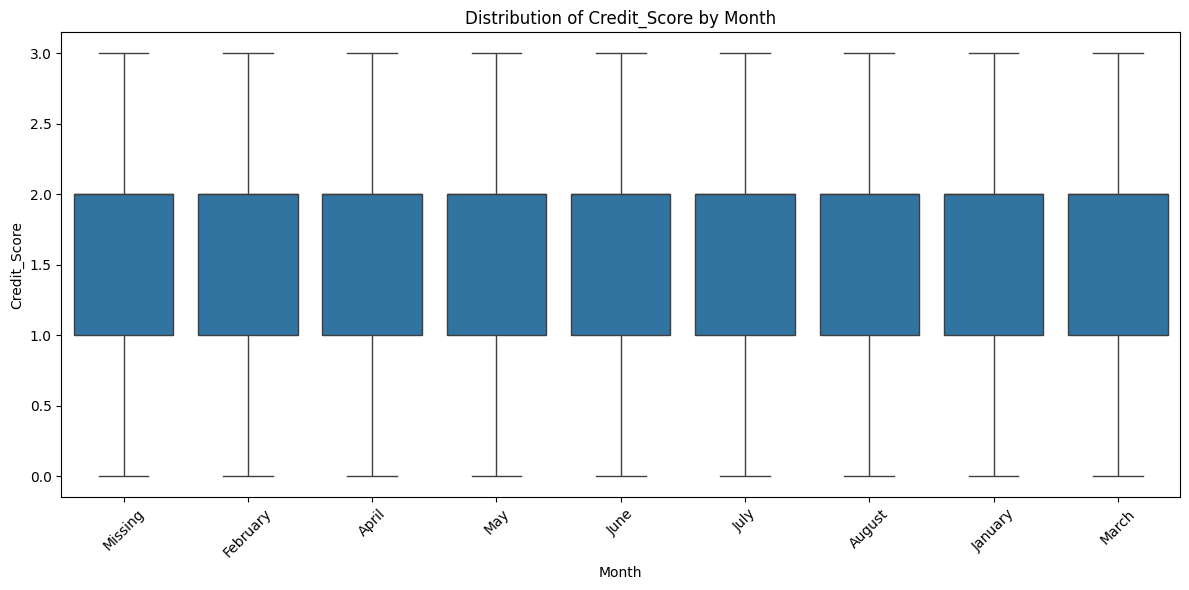


Analysis of City vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
              count      mean       std  min  max  percentage
City                                                         
BadShire      26066  1.000000  0.000000    1    1       26.07
Lonton        16024  3.000000  0.000000    3    3       16.02
Missing        9851  1.871688  0.681132    0    3        9.85
Standhampton  47744  2.000000  0.000000    2    2       47.74
ZeroVille       315  0.000000  0.000000    0    0        0.32


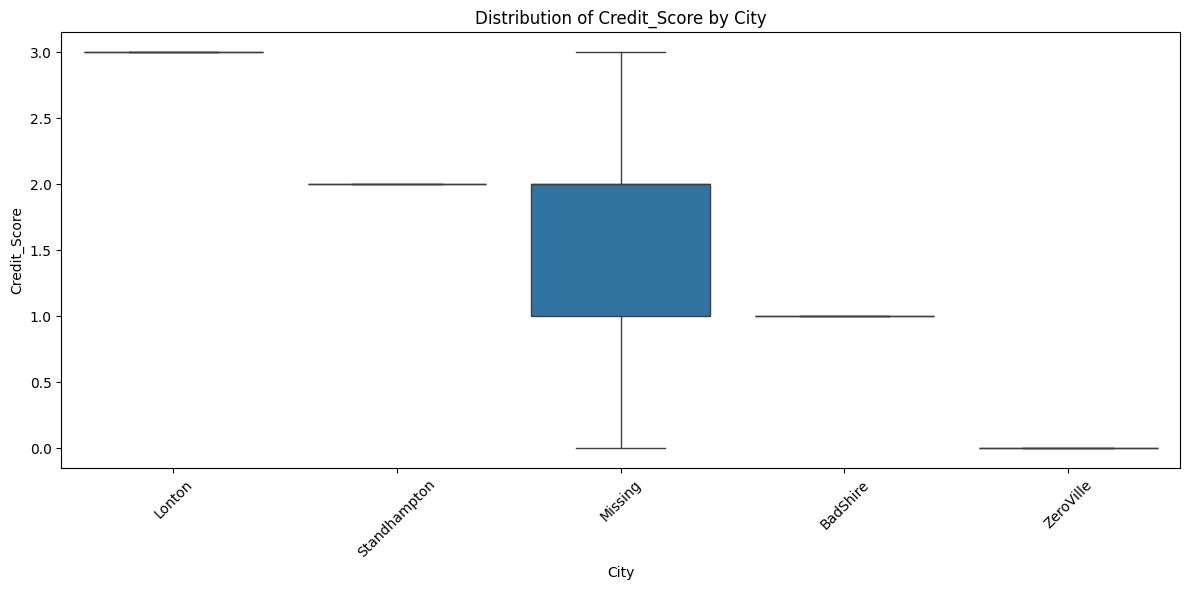


Analysis of Street vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
                  count      mean       std  min  max  percentage
Street                                                           
Abbey Drive        1434  2.747559  0.445663    0    3        1.43
Baker Street       1518  2.778656  0.442940    0    3        1.52
Canal Street       1369  2.778671  0.449120    0    3        1.37
Downing Street     1435  2.755401  0.494845    0    3        1.44
Elm Street         1449  2.790200  0.456855    0    3        1.45
Fleet Street       5151  1.990681  0.449715    0    3        5.15
Grove Street       4881  1.972956  0.462183    0    3        4.88
High Street        5052  1.984165  0.481849    0    3        5.05
Imperial Street    4756  1.981707  0.482154    0    3        4.76
Jubilee Street     4998  1.968988  0.471776    0    3        5.00
King Street        2760  1.222464  0.415976    1    2        2.76
Lo

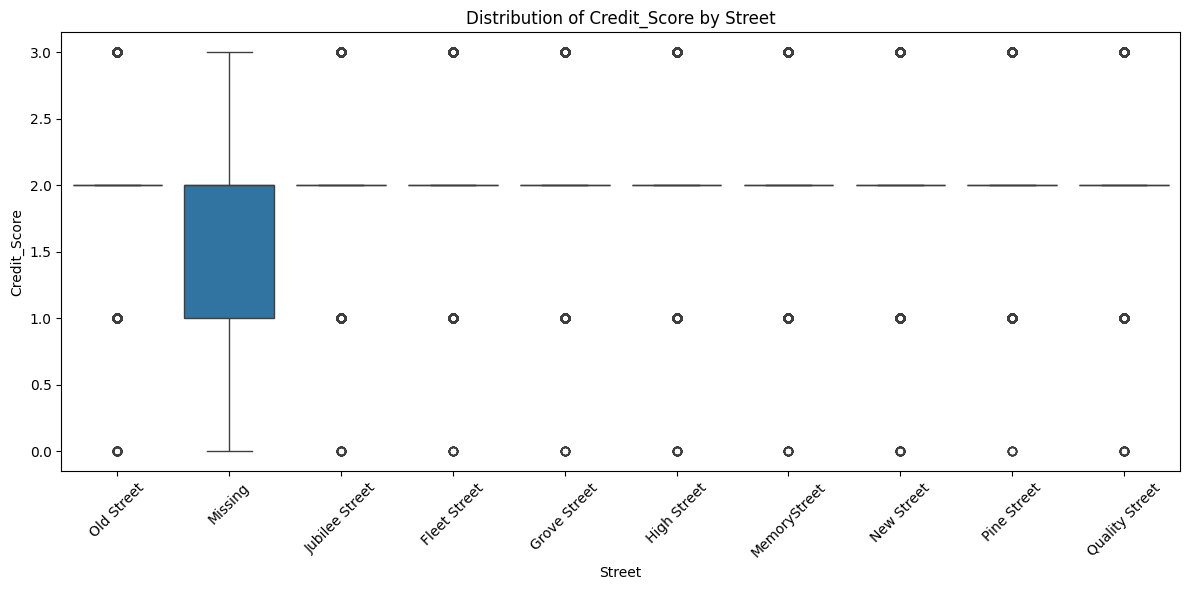


Analysis of Occupation vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
               count      mean       std  min  max  percentage
Occupation                                                    
Accountant      1578  2.771229  0.475402    0    3        1.58
Architect      16576  1.974059  0.467647    0    3       16.58
Artist          3360  1.195238  0.401665    1    3        3.36
Cleaner         3418  1.197776  0.400579    0    2        3.42
Developer       1283  2.750585  0.540257    0    3        1.28
Doctor          1619  2.757258  0.438845    0    3        1.62
Engineer        1723  2.757400  0.470126    0    3        1.72
Entrepreneur    1623  2.760937  0.474532    0    3        1.62
Farmer          3083  1.202076  0.407230    0    2        3.08
Journalist     17002  1.976944  0.470715    0    3       17.00
Lawyer          1432  2.762570  0.489779    0    3        1.43
Manager         1588  2.786524  0.453

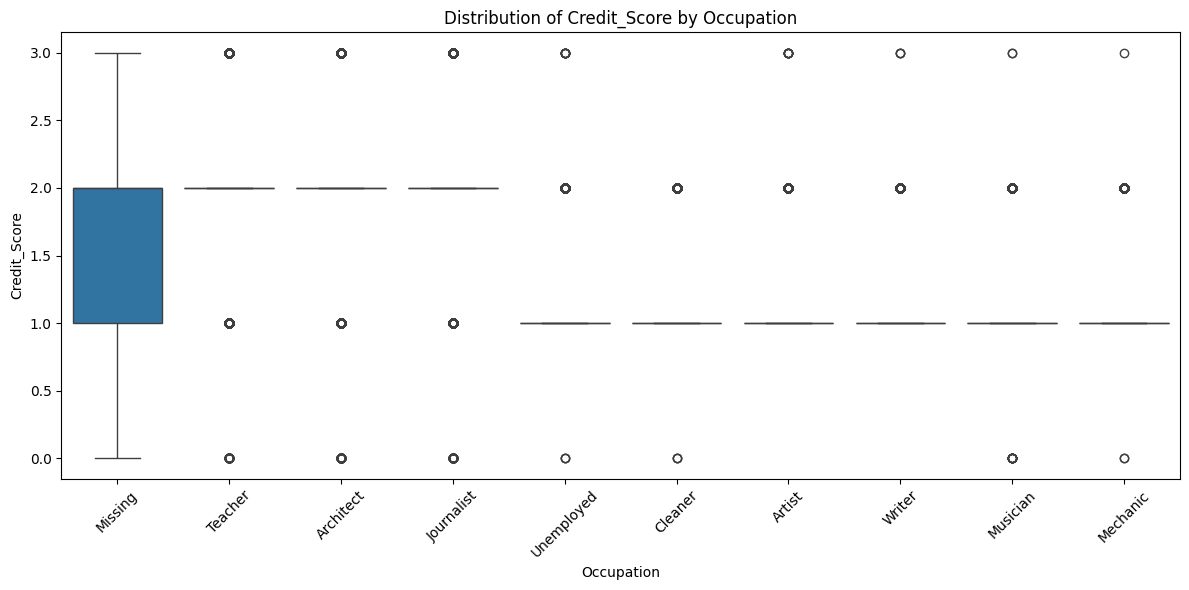


Analysis of Credit_Mix vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
            count      mean       std  min  max  percentage
Credit_Mix                                                 
Bad         17085  1.412994  0.522381    1    3       17.08
Good        21915  2.313484  0.754602    0    3       21.92
Missing      9915  1.887040  0.685264    0    3        9.92
Standard    32875  1.834373  0.505887    0    3       32.88
_           18210  1.878528  0.684647    0    3       18.21


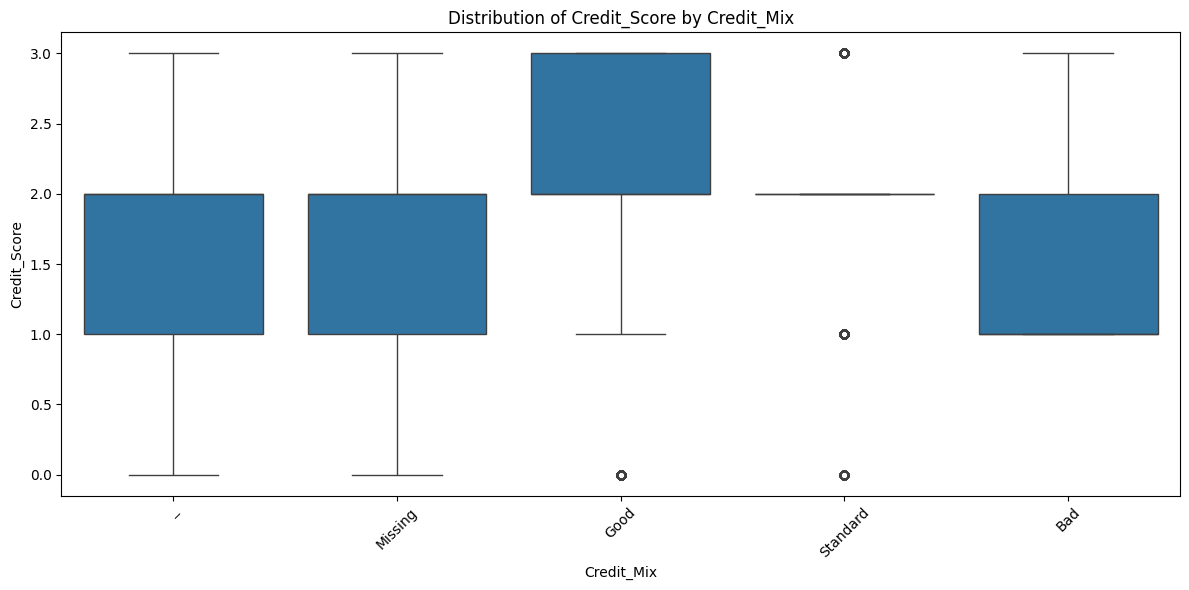


Analysis of Payment_of_Min_Amount vs Credit_Score
--------------------------------------------------

Statistical Summary:
------------------------------
                       count      mean       std  min  max  percentage
Payment_of_Min_Amount                                                 
Missing                 9957  1.891534  0.682889    0    3        9.96
NM                     10815  1.886639  0.692039    0    3       10.82
No                     32024  2.233981  0.697106    0    3       32.02
Yes                    47204  1.637255  0.553816    0    3       47.20


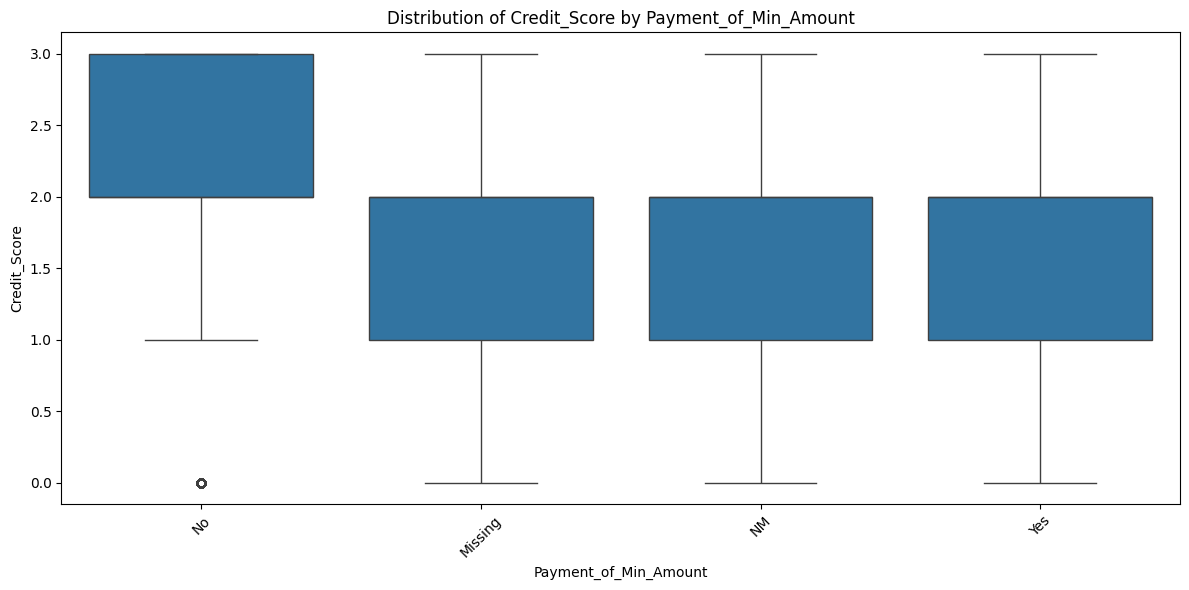

In [41]:
target = 'Credit_Score'

for feature in true_categorical_features:    
    print(f"\nAnalysis of {feature} vs {target}")
    print("-" * 50)
    
    # Create a copy and handle missing values
    df_plot = df.copy()
    df_plot[feature] = df_plot[feature].fillna('Missing')
    
    # Statistical Summary
    print("\nStatistical Summary:")
    print("-" * 30)
    summary = df_plot.groupby(feature)[target].agg(['count', 'mean', 'std', 'min', 'max'])
    summary['percentage'] = (summary['count'] / len(df_plot) * 100).round(2)
    print(summary)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    # Check if there are more than 10 categories
    if df_plot[feature].nunique() > 10:
        top_categories = df_plot[feature].value_counts().nlargest(10).index.tolist()
        df_plot = df_plot[df_plot[feature].isin(top_categories)]
        print(f"\nShowing only top 10 categories for {feature}")
    
    sns.boxplot(x=feature, y=target, data=df_plot)
    plt.title(f'Distribution of {target} by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



Analyzing the distribution of Credit_Score across true categorical features reveals important associations and potential data issues:

- Month shows a very uniform distribution in both frequency and average credit score (~1.87–1.89 across all months), confirming consistent data collection across time with no apparent seasonal effect on credit score trends.

- City reveals perfect correlation with Credit_Score, which is highly suspicious:

  - BadShire always has a score of 1, Lonton always 3, and Standhampton always 2. ZeroVille is always 0. 

  - This pattern is unrealistic and suggests either data leakage or synthetic encoding, warranting a deeper investigation or possible exclusion of this feature.

- Street shows clusters of high and low average scores, with some (e.g., Elm Street, Oxford Street) averaging near 2.8 and others (Queen Street, Park Street) averaging close to 1.2. Given that streets are often linked to geographic or socioeconomic context, these variations may be informative—but also at risk of embedding location-driven bias.

- Occupation exhibits clear stratification:

  - High-income or professional roles (Scientist, Manager, Engineer) align with higher average scores (~2.7–2.8),

  - While manual or entry-level roles (Cleaner, Mechanic, Student) align with lower scores (~1.2).
This trend appears realistic and could offer valuable predictive power.

- Credit_Mix shows expected behavior:

  - Good credit mix aligns with the highest average score (2.31), while Bad aligns with the lowest (1.41).

  - The placeholder _ and missing values have similar average scores (~1.88), suggesting a neutral or unclear contribution.

- Payment_of_Min_Amount is also informative:

  - No payments correspond to higher average scores (2.23), while Yes surprisingly aligns with lower scores (1.63).
This could reflect debt minimization behavior, where clients able to pay full balances score better, or a labeling inconsistency needing further clarification.

Overall, while most features provide meaningful class separation, City and possibly Street may require careful treatment to avoid misleading signals in modeling due to potential encoding artifacts or overfitting risks.